# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# pip install tensorflow 

## 손실 곡선

In [2]:
####################################################################################################
# 패션 MNIST 데이터셋을 읽어 훈련셋과 테스트셋에 저장합니다.
# --------------------------------------------------------------------------------------------------
# load_data() 메서드는 두 종류의 데이터셋을 한번에 반환하므로 분할 절차를 생략할 수 있어 편리합니다.
####################################################################################################
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

####################################################################################################
# 데이터의 스케일을 조정하고 1차원 배열로 변환합니다.
# --------------------------------------------------------------------------------------------------
# 0~255의 값을 0~1로 조정합니다.
# 이미지의 경우 255로 나눠주기만 하면 됩니다. MinMaxScaler()를 사용한 것과 동일한 결과입니다.
# 2차원 배열의 형태를 가진 하나의 샘플을 1차원 배열로 변환해주면, 784개(28*28) 값이 1개 행으로 변환됩니다.
####################################################################################################
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
####################################################################################################
# 인공신경망 모델을 생성하는 사용자 정의 함수를 생성합니다.
# --------------------------------------------------------------------------------------------------
# Flatten 층, 은닉층, 출력층을 포함하는 인공신경망 모델을 생성합니다.
# 은닉층 이후에 드롭아웃 층을 추가하여 은닉층 중 일부 노드의 기능을 랜덤하게 중단할 수 있도록 하는 데에 
# 사용할 목적으로 매개변수 a_layer를 활용합니다. 즉, 층이 매개변수로 들어오면 이 층을 추가합니다.
####################################################################################################
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
####################################################################################################
# 사용자 정의 함수를 이용하여 인공신경망 모델을 생성합니다.
# --------------------------------------------------------------------------------------------------
# Flatten 층, 은닉층, 출력층을 포함하는 인공신경망 모델을 생성합니다.
# 은닉층 이후에 드롭아웃 층을 추가하여 은닉층 중 일부 노드의 기능을 랜덤하게 중단할 수 있도록 하는 데에 
# 사용할 목적으로 매개변수 a_layer를 활용합니다. 즉, 층이 매개변수로 들어오면 이 층을 추가합니다.
# 모델의 정보를 확인합니다.
####################################################################################################
model = model_fn()

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
####################################################################################################
# 인공신경망 훈련을 위한 설정값(손실함수와 성능지표)을 입력합니다.
# --------------------------------------------------------------------------------------------------
# 이진 분류의 경우 손실함수를 'binary_crossentropy'로, 다중 분류의 경우 'categorical_crossentropy'로
# 설정합니다.
# 타깃 데이터의 레이블이 원-핫 인코딩된 경우 'sparse_'를 손실함수명 앞에 추가하면 됩니다.
# 성능지표에 'accuracy'를 사용하면 정확도를 사용합니다.
# 모델의 훈련결과를 History 클래스의 객체에 저장합니다.
####################################################################################################
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
####################################################################################################
# 히스토리 객체에 담기는 정보의 종류를 확인합니다.
# --------------------------------------------------------------------------------------------------
# 손실 비용과 정확도가 저장됨을 확인합니다.
####################################################################################################
print(history.history.keys())

dict_keys(['loss', 'acc'])


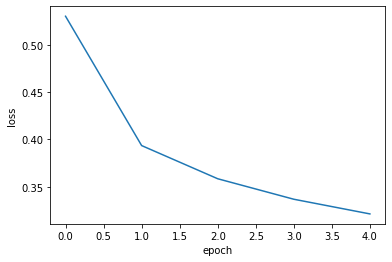

In [7]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 손실이 감소합니다.
####################################################################################################
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

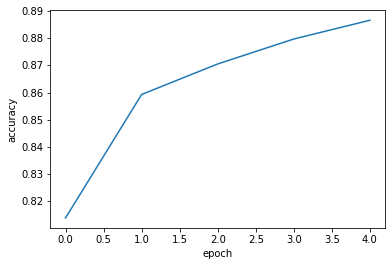

In [8]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 정확도가 증가합니다.
####################################################################################################
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
####################################################################################################
# 모델을 생성하고 훈련합니다.
# --------------------------------------------------------------------------------------------------
# 에포크를 증가시켜 훈련 손실이 감소함을 확인합니다.
####################################################################################################
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

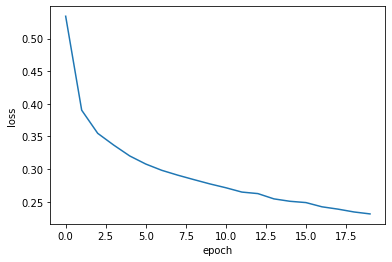

In [10]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 손실이 감소합니다.
####################################################################################################
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [11]:
####################################################################################################
# 모델을 생성하고 훈련합니다.
# --------------------------------------------------------------------------------------------------
# 검증 데이터를 포함시킵니다.
####################################################################################################
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [12]:
####################################################################################################
# 히스토리 객체에 담기는 정보의 종류를 확인합니다.
# --------------------------------------------------------------------------------------------------
# 손실 비용과 정확도가 훈련셋, 검증셋에 대해 저장됨을 확인합니다.
####################################################################################################
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


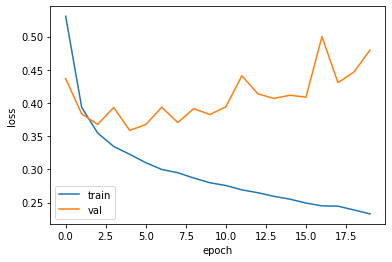

In [13]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 훈련셋의 손실이 감소하는 반면, 검증셋에 대해서는 약간 감소하다가 증가하는 경향이 
# 보입니다.
####################################################################################################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
####################################################################################################
# 모델의 하이퍼파라미터를 설정하고 훈련합니다.
# --------------------------------------------------------------------------------------------------
# 옵티마이저를 'adam'으로 변경해봅니다.
# 옵티마이저의 변경을 통해서도 모델의 과적합을 방지할 수 있습니다.
####################################################################################################model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

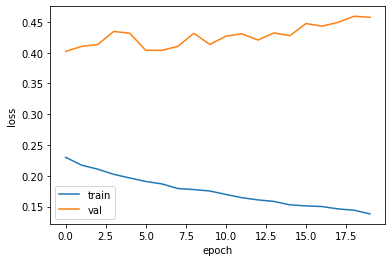

In [15]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 검증셋에서도 손실이 증가하는 에포크의 위치가 뒤로 늦춰진 것을 볼 수 있습니다.
####################################################################################################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [16]:
####################################################################################################
# 드롭아웃 층을 추가시킨 모델의 정보를 확인합니다.
# --------------------------------------------------------------------------------------------------
# 드롭아웃 레이어를 추가함으로써 은닉층의 노드 중 30%(매개변수 값)의 작동을 랜덤하게 중단시킵니다.
# 작동되지 않는 노드는 샘플에 따라 달라집니다.
####################################################################################################
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
####################################################################################################
# 인공신경망 훈련을 위한 설정값(손실함수와 성능지표)을 입력하고 모델을 훈련합니다.
# --------------------------------------------------------------------------------------------------
# 드롭아웃 층이 포함된 모델을 훈련합니다.
####################################################################################################
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

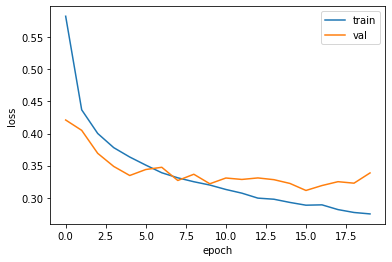

In [18]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 검증셋의 손실이 많이 감소한 것으로 보아, 드롭아웃이 잘 작동되었음을 확인할 수 있습니다.
####################################################################################################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [19]:
####################################################################################################
# 모델을 생성하고 훈련합니다.
####################################################################################################model = model_fn()
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [20]:
####################################################################################################
# 모델에서 학습한 파라미터(가중치, 절편)을 파일에 저장합니다.
####################################################################################################model = model_fn()
model.save_weights('model-weights.h5')

In [21]:
####################################################################################################
# 학습된 모델 자체를 파일에 저장합니다.
####################################################################################################model = model_fn()
model.save('model-whole.h5')

In [22]:
!ls -al *.h5

-rw-r--r--  1 boysbeanxious  staff  332616  5 18 21:32 model-weights.h5
-rw-r--r--  1 boysbeanxious  staff  982904  5 18 21:32 model-whole.h5


In [23]:
####################################################################################################
# 모델에서 학습한 파라미터(가중치, 절편)를 파일로부터 읽어옵니다.
####################################################################################################model = model_fn()
model = model_fn(keras.layers.Dropout(0.3))

In [24]:
# pip install h5py==2.10.0
# https://littlestartime.tistory.com/16

In [25]:
model.load_weights('model-weights.h5')

In [26]:
####################################################################################################
# 모델의 성능을 확인합니다.
# --------------------------------------------------------------------------------------------------
# 검증 데이터에 대해 예측값(레이블)을 구하고, 이를 정답(타깃 레이블)과 비교하여 정확도를 구합니다.
####################################################################################################
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.877


In [27]:
####################################################################################################
# 파일에 저장된 모델을 읽어와서 모델 객체에 할당합니다.
# --------------------------------------------------------------------------------------------------
# 파라미터뿐만 읽어오는 방식이 아니라 모델 자체를 읽어옵니다.
####################################################################################################
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
12000/12000 [==============================] - 0s 23us/sample - loss: 0.3435 - acc: 0.8770


[0.34352306501070656, 0.877]

## 콜백

In [28]:
####################################################################################################
# 콜백 기능을 활용하여 최적의 모델을 저장합니다.
# --------------------------------------------------------------------------------------------------
# 콜백은 훈련 중에 어떤 작업을 수행할 수 있게 해주는 객체를 의미합니다.
# 콜백을 사용함으로써 학습과정에서 가장 성능이 좋은 모델을 파일에 저장하게 됩니다.
####################################################################################################
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [29]:
####################################################################################################
# 콜백 기능을 활용하여 최적의 모델을 저장합니다.
# --------------------------------------------------------------------------------------------------
# 콜백에 의해 가장 성능이 좋은 모델이 저장된 파일로부터 모델을 읽어옵니다.
# 검증 데이터를 사용하여 모델을 평가합니다.
####################################################################################################
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 26us/sample - loss: 0.3201 - acc: 0.8837


[0.3201187046567599, 0.8836667]

In [30]:
####################################################################################################
# 콜백 기능을 활용하여 최고의 모델을 저장하고, 훈련을 조기종료합니다.
# --------------------------------------------------------------------------------------------------
# 콜백을 사용함으로써 학습과정에서 가장 성능이 좋은 모델을 파일에 저장하게 됩니다.
# patience=2로 지정함으로써, 성능이 나빠지기 시작하면 2번의 에포크만에 훈련을 중단합니다.
# restore_best_weights=True로 지정함으로써, 가장 성능이 좋은 모델을 반환하도록 합니다.
# 즉, 훈련이 종료된 후 model 객체는 가장 성능이 좋은 모델이 됩니다.
####################################################################################################
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [31]:
####################################################################################################
# 콜백 기능을 활용하여 훈련이 조기종료된 에포크를 확인합니다.
####################################################################################################
print(early_stopping_cb.stopped_epoch)

8


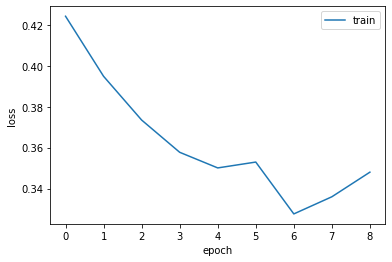

In [32]:
####################################################################################################
# 히스토리 객체에 담긴 값을 에포크 별로 시각화합니다.
# --------------------------------------------------------------------------------------------------
# 에포크가 진행될수록 훈련셋, 검증셋 모두 손실이 잘 감소하였으며, 조기종료된 위치에서 patience=2만큼 전에
# 검증 손실이 최솟값이 됨을 확인할 수 있습니다.
####################################################################################################plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [33]:
####################################################################################################
# 히스토리 객체에 담긴 값을 출력해봅니다.
# --------------------------------------------------------------------------------------------------
# 훈련 손실은 계속 감소함을 확인할 수 있습니다.
####################################################################################################plt.plot(history.history['loss'])
history.history['loss']

[0.5920794563094774,
 0.44399780136346817,
 0.40927640397598347,
 0.38571179579695064,
 0.36945007708172,
 0.3562647065470616,
 0.34554174429674944,
 0.3360273033628861,
 0.32887491217752296]

In [34]:
####################################################################################################
# 히스토리 객체에 담긴 값을 출력해봅니다.
# --------------------------------------------------------------------------------------------------
# 검증 손실은 epoch=4까지 계속 감소하다가 이후에는 증가함을 확인할 수 있습니다.
####################################################################################################plt.plot(history.history['loss'])
history.history['val_loss']

[0.4243205046057701,
 0.39491527318954467,
 0.37351421852906547,
 0.35773060329755146,
 0.35008097664515175,
 0.3529474812547366,
 0.3275658451418082,
 0.33595686868826546,
 0.3480041119058927]

In [35]:
####################################################################################################
# 모델의 성능을 확인합니다.
####################################################################################################
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 19us/sample - loss: 0.3276 - acc: 0.8813


[0.3275658435821533, 0.88133335]